In [1]:
'''
7 gen W Donato Marc Luca Ferro Scalzo
7 gen W Donato Bond Luca Ferro Scalzo
7 gen L Bond Scalzo Ferro Luca Marc
8 gen L Donato Kate Ferro Luca Marc
8 gen W Kate Marc Ferro Luca Donato
8 gen W Ferro Luca Marc Kate Donato
10 gen L Vitto Scalzo Luca Donato Kate
10 gen W Luca Donato Kate Vitto Scalzo
10 gen W Vitto Donato Kate Luca Scalzo
10 gen W Scalzo Kate Vitto Donato Luca
10 gen L Kate Luca Scalzo Vitto Donato
13 gen W Luca Scalzo Marc Massi Vitto
13 gen L Bond Vitto Marc Massi Scalzo
13 gen Lm Scalzo Bond Vitto Luca Massi
13 gen W Marc Vitto Scalzo Bond Massi
15 gen L Bond Ferro Vitto Donato Marc
15 gen W Marc Vitto Ferro Donato Bond
15 gen L Vitto Ferro Donato Marc Bond
17 gen W Donato Kate Ferro Vitto Scalzo
17 gen L Kate Vitto Marc Ferro Scalzo
17 gen L Ferro Vitto Marc Donato Kate
20 gen W Vitto Scalzo Marc Bond Luca
21 gen W Luca Donato Marc Ferro Kate
21 gen L Ferro Donato Marc Luca Kate
22 gen L Kate Luca Donato Bond Scalzo
22 gen W Donato Luca Marc Vitto Kate
22 gen W Bond Kate Marc Luca Scalzo
22 gen W Kate Marc Donato Luca Bond
23 gen W Donato Scalzo Ferro Marc Vitto
23 gen W Scalzo Marc Donato Ferro Vitto
24 gen L Luca Massi Marc Kate Ric
24 gen W Luca Massi Marc Kate Ric
24 gen L Donato Luca Marc Vitto Bond
24 gen L Luca Ferro Marc Vitto Bond
27 gen W Massi Scalzo Luca Vitto Mike
27 gen W Vitto Luca Marc Bond Mike
28 gen L Luca Kate Marc Donato Scalzo
28 gen W Marc Donato Luca Kate Scalzo
28 gen L Kate Bond Scalzo Donato Luca
28 gen L Ale Kate Massi Luca Marc
29 gen W Marc Vitto Luca Ferro Scalzo
29 gen W Bond Luca Ferro Vitto Scalzo
29 gen W Marc Luca Donato Vitto Bond
'''

'\n7 gen W Donato Marc Luca Ferro Scalzo\n7 gen W Donato Bond Luca Ferro Scalzo\n7 gen L Bond Scalzo Ferro Luca Marc\n8 gen L Donato Kate Ferro Luca Marc\n8 gen W Kate Marc Ferro Luca Donato\n8 gen W Ferro Luca Marc Kate Donato\n10 gen L Vitto Scalzo Luca Donato Kate\n10 gen W Luca Donato Kate Vitto Scalzo\n10 gen W Vitto Donato Kate Luca Scalzo\n10 gen W Scalzo Kate Vitto Donato Luca\n10 gen L Kate Luca Scalzo Vitto Donato\n13 gen W Luca Scalzo Marc Massi Vitto\n13 gen L Bond Vitto Marc Massi Scalzo\n13 gen Lm Scalzo Bond Vitto Luca Massi\n13 gen W Marc Vitto Scalzo Bond Massi\n15 gen L Bond Ferro Vitto Donato Marc\n15 gen W Marc Vitto Ferro Donato Bond\n15 gen L Vitto Ferro Donato Marc Bond\n17 gen W Donato Kate Ferro Vitto Scalzo\n17 gen L Kate Vitto Marc Ferro Scalzo\n17 gen L Ferro Vitto Marc Donato Kate\n20 gen W Vitto Scalzo Marc Bond Luca\n21 gen W Luca Donato Marc Ferro Kate\n21 gen L Ferro Donato Marc Luca Kate\n22 gen L Kate Luca Donato Bond Scalzo\n22 gen W Donato Luca Marc

In [2]:
from datetime import datetime
def parse_partite(raw_data) -> list:
    partite = []
    for riga in raw_data.strip().split("\n"):
        elementi = riga.split()
        data = f"{elementi[0]} {elementi[1]}"  # Combina giorno e mese
        risultato = elementi[2]  # Risultato (W, L, Wm, Lm)
        giocatori = elementi[3:]  # Lista di giocatori
        partite.append((data, risultato, giocatori))
    return partite

def conta_presenze(partite):
    presenze = {} # = {'p1': 35, 'p2': 29,...}
    elenco_giocatori_ordine_alfabetico = list()
    for partita in partite:
        giocatori = partita[2]
        for giocatore in giocatori:
            if giocatore not in elenco_giocatori_ordine_alfabetico:
                elenco_giocatori_ordine_alfabetico.append(giocatore)
                elenco_giocatori_ordine_alfabetico.sort()
    for giocatore in elenco_giocatori_ordine_alfabetico:
        presenze[giocatore] = 0
        for partita in partite:
            giocatori = partita[2]
            if giocatore in giocatori:
                presenze[giocatore] += 1
    presenze = dict(sorted(presenze.items(), key=lambda item: item[1], reverse=True))
    return elenco_giocatori_ordine_alfabetico, presenze

def calcola_classifica(partite):
    # Dizionario per i punteggi dei giocatori
    punteggi = {}

    # Calcolo dei punteggi
    for data, risultato, giocatori in partite:
        if risultato == "W":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "L":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4 # p1
            for p in giocatori[1:]:  # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "Lm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4 # p1
            for p in giocatori[1:]: # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 2
        elif risultato == "Lv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 2
        else:
            print(f"Errore risultato non riconosciuto: {risultato}")
            #break

    # Ordinamento della classifica
    classifica = sorted(punteggi.items(), key=lambda x: x[1], reverse=True)
    return punteggi, classifica

def conta_punti_a_partita(punteggi, presenze):
    punti_a_partita = {}  # {'Donato': 0,26, 'Marc': 0,25, 'Luca': 0,19
    for giocatore in punteggi:
        punti_ = punteggi[giocatore]
        partite_giocate_ = presenze[giocatore]
        #print(punti_, "\t", partite_giocate_)
        punti_a_partita[giocatore] = round(punti_/partite_giocate_, 3)
        punti_a_partita = dict(sorted(punti_a_partita.items(), key=lambda item: item[1], reverse=True))
    return punti_a_partita

def calcola_time():
    today = datetime.today().strftime('%d/%m')
    hourUTC = datetime.now().strftime('%H')
    hourIT = int(hourUTC) + 1
    min = datetime.now().strftime('%M')
    now = f"{hourIT}:{min}"
    return today, now

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Run
raw_data_ = [_][0]
# Parsing delle partite
partite = parse_partite(raw_data_)
#print(partite[5])  #('8 gen', 'W', ['Ferro', 'Luca', 'Marc', 'Kate', 'Donato'])
                    # str, char, list
                    # data, risultato, giocatori
# Calcolo della classifica
punteggi, classifica = calcola_classifica(partite)
#print(punteggi)          # {'Donato': 8, 'Marc': 11, 'Luca': 0, 'Ferro': -10,
#print(list(classifica))  # [('Marc', 11), ('Donato', 8), ('Luca
#print(classifica)        # [('Marc', 11), ('Donato', 8), ('Luca
#print(partite[9][2])     # ['Scalzo', 'Kate', 'Vitto', 'Donato', 'Luca']
                          # quindi giocatori_di_una_partita è partite[][2]
today, now = calcola_time()
print(f"Classifica aggiornata al {today}, {now}:")
for giocatore, punteggio in classifica:
    print(f"{giocatore}:\t {punteggio}")
# Calcolo presenze per giocatore
elenco_giocatori_ordine_alfabetico, presenze = conta_presenze(partite)
#print(elenco_giocatori_ordine_alfabetico)
print("\nPresenze:")
presenze = list(presenze.items()) # Perché presenze era un dict e adesso mi serve una list
for giocatore, presenze_giocatore in presenze:
    print(f"{giocatore}:\t{ presenze_giocatore} ({round(100*presenze_giocatore/(len(partite)),1)}%)")

print("\nPunti a partita:")
presenze = dict(presenze) # Perché presenze era una list
punti_a_partita = conta_punti_a_partita(punteggi, presenze)
for giocatore, punti in punti_a_partita.items():
    print(f"{giocatore}:\t{punti}")

Classifica aggiornata al 30/01, 12:17:
Marc:	 18
Donato:	 10
Massi:	 3
Luca:	 0
Ric:	 0
Scalzo:	 -2
Mike:	 -2
Ale:	 -2
Bond:	 -3
Vitto:	 -3
Kate:	 -7
Ferro:	 -12

Presenze:
Luca:	33 (76.7%)
Marc:	31 (72.1%)
Donato:	27 (62.8%)
Vitto:	26 (60.5%)
Scalzo:	25 (58.1%)
Kate:	23 (53.5%)
Ferro:	19 (44.2%)
Bond:	18 (41.9%)
Massi:	8 (18.6%)
Mike:	2 (4.7%)
Ric:	2 (4.7%)
Ale:	1 (2.3%)

Punti a partita:
Marc:	0.581
Massi:	0.375
Donato:	0.37
Luca:	0.0
Ric:	0.0
Scalzo:	-0.08
Vitto:	-0.115
Bond:	-0.167
Kate:	-0.304
Ferro:	-0.632
Mike:	-1.0
Ale:	-2.0


In [3]:
def calcola_punteggio_partita(giocatore, partita):
  # Calcolo del punteggio di un giocatore in ogni singola partita
  giocatori = partita[2]
  if giocatore not in giocatori:
    return 0  # Se il giocatore non ha giocato scrive 0
  elif giocatore in giocatori:
    if partita[1] == "W":
      if giocatore == giocatori[0]:     # Se il giocatore è il giaguaro
        return 2
      elif giocatore == giocatori[1]:   # Se il giocatore è l'amico
        return 1
      elif giocatore in giocatori[2:]:
        return -1
    elif partita[1] == "L":
      if giocatore == giocatori[0]:
        return -2
      elif giocatore == giocatori[1]:
        return -1
      elif giocatore in giocatori[2:]:
        return 1
    elif partita[1] == "Wm":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore in giocatori[1:]:
        return -1
    elif partita[1] == "Lm":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore in giocatori[1:]:
        return 1
    elif partita[1] == "Wv":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore == giocatori[1]:
        return 2
      elif giocatore in giocatori[2:]:
        return -2
    elif partita[1] == "Lv":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore == giocatori[1]:
        return -2
      elif giocatore in giocatori[2:]:
        return 2
    else:
      print(f"Errore risultato non riconosciuto: {partita[1]}")
      #break()
      return -1000

def calcola_timeseries(elenco_giocatori_ordine_alfabetico, partite) -> dict:
  timeseries = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    risultati_giocatore = []
    for partita in partite:
      risultati_giocatore.append(calcola_punteggio_partita(giocatore, partita))
    timeseries[giocatore] = risultati_giocatore
  return timeseries

print('Punteggi dalla 35esima partita in poi:')
for giocatore in elenco_giocatori_ordine_alfabetico:
  punteggio = 0
  for partita in partite[35:]:
    punteggio += calcola_punteggio_partita(giocatore, partita)
  print(f"{giocatore}:\t{punteggio}")

print('Prime 5 partite:')
print(elenco_giocatori_ordine_alfabetico)
for partita in partite[:5]:
  lista_risultati = []
  for giocatore in elenco_giocatori_ordine_alfabetico:
    lista_risultati.append(calcola_punteggio_partita(giocatore, partita))
  print(lista_risultati)

print('')
timeseries = dict(calcola_timeseries(elenco_giocatori_ordine_alfabetico,partite))
for giocatore in timeseries:
   print(f"{giocatore}:\t{timeseries[giocatore]}")

Punteggi dalla 35esima partita in poi:
Ale:	-2
Bond:	-1
Donato:	2
Ferro:	-2
Kate:	-5
Luca:	1
Marc:	7
Massi:	1
Mike:	-1
Ric:	0
Scalzo:	-1
Vitto:	1
Prime 5 partite:
['Ale', 'Bond', 'Donato', 'Ferro', 'Kate', 'Luca', 'Marc', 'Massi', 'Mike', 'Ric', 'Scalzo', 'Vitto']
[0, 0, 2, -1, 0, -1, 1, 0, 0, 0, -1, 0]
[0, 1, 2, -1, 0, -1, 0, 0, 0, 0, -1, 0]
[0, -2, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0]
[0, 0, -2, 1, -1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, -1, -1, 2, -1, 1, 0, 0, 0, 0, 0]

Ale:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0]
Bond:	[0, 1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 1, -1, -2, -1, 1, 0, 0, 0, -1, 0, 0, 1, 0, 2, -1, 0, 0, 0, 0, 1, 1, 0, -1, 0, 0, -1, 0, 0, 2, -1]
Donato:	[2, 2, 0, -2, -1, -1, 1, 1, 1, -1, 1, 0, 0, 0, 0, 1, -1, 1, 2, 0, 1, 0, 1, -1, 1, 2, 0, -1, 2, -1, 0, 0, -2, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1]
Ferro:	[-1, -1, 1, 1, -1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 1, -2, 0, -1, -2, 0, 0, 0, 0, -1, 

In [4]:
def calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico, partite) -> dict():
  incremento_punteggi = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    incremento_punteggi[giocatore] = []
    count = 0
    for partita in partite:
       count += calcola_punteggio_partita(giocatore, partita)
       incremento_punteggi[giocatore].append(count)
  return incremento_punteggi
#incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite[:5]))
#print(incremento_punteggi)

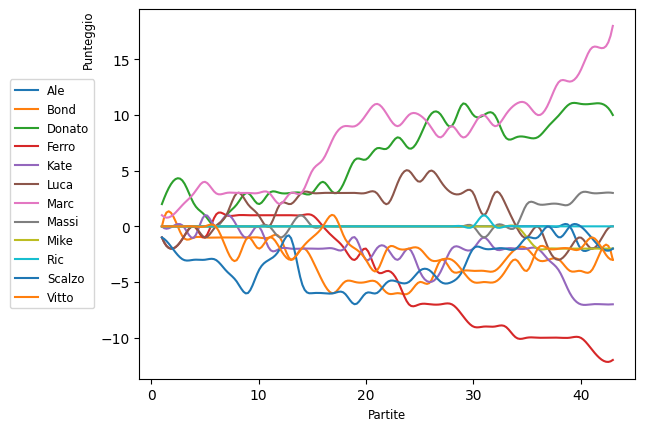

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

def disegna(giocatore, partite):
  #matches = (np.arange(1, len(partite)+1)).tolist()
  #points = np.array(incremento_punteggi[giocatore])
  #Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class
  x = (np.arange(1, len(partite)+1)).tolist()
  y = np.array(incremento_punteggi[giocatore])
  X_Y_Spline = make_interp_spline(x, y)
  X_ = np.linspace(x[0], x[len(x)-1], 200)
  Y_ = X_Y_Spline(X_)
  plt.xlabel('Partite', fontsize='small')
  plt.ylabel('Punteggio', loc='top', fontsize='small')
  #plt.plot(matches, points, linestyle='-')
  plt.plot(X_, Y_)

def disegna_multi(giocatori, partite):
  for giocatore in giocatori:
    disegna(giocatore, partite)
  plt.legend(giocatori, loc='center right', bbox_to_anchor=(-0.08, 0.5), fontsize='small')

incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite))
tutti = elenco_giocatori_ordine_alfabetico
#team2024 = ['Donato', 'Luca', 'Marc', 'Ferro', 'Vitto']
#teamexport = ['Bond', 'Scalzo', 'Vitto']
disegna_multi(tutti, partite)
#plt.show()

In [6]:
def calcola_punteggio_partita_con_assenze(giocatore, partita) -> str:
  # Calcolo del punteggio di un giocatore in ogni singola partita
  giocatori = partita[2]
  if giocatore not in giocatori:
    return 'NaN'  # Se il giocatore non ha giocato scrive 0
  elif giocatore in giocatori:
    if partita[1] == "W":
      if giocatore == giocatori[0]:     # Se il giocatore è il giaguaro
        return 2
      elif giocatore == giocatori[1]:   # Se il giocatore è l'amico
        return 1
      elif giocatore in giocatori[2:]:
        return -1
    elif partita[1] == "L":
      if giocatore == giocatori[0]:
        return -2
      elif giocatore == giocatori[1]:
        return -1
      elif giocatore in giocatori[2:]:
        return 1
    elif partita[1] == "Wm":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore in giocatori[1:]:
        return -1
    elif partita[1] == "Lm":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore in giocatori[1:]:
        return 1
    elif partita[1] == "Wv":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore == giocatori[1]:
        return 2
      elif giocatore in giocatori[2:]:
        return -2
    elif partita[1] == "Lv":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore == giocatori[1]:
        return -2
      elif giocatore in giocatori[2:]:
        return 2
    else:
      print(f"Errore risultato non riconosciuto: {partita[1]}")
      #break()
      return -1000

def calcola_timeseries_con_assenze(elenco_giocatori_ordine_alfabetico, partite) -> dict:
  timeseries = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    risultati_giocatore = []
    for partita in partite:
      risultati_giocatore.append(calcola_punteggio_partita_con_assenze(giocatore, partita))
    timeseries[giocatore] = risultati_giocatore
  return timeseries

timeseries_con_assenze = dict(calcola_timeseries_con_assenze(elenco_giocatori_ordine_alfabetico,partite))

print(timeseries_con_assenze['Donato'])
print('Attenzione tutti gli 0 significano partita non disputata nell\'altra lista! Ma serve nel caso in cui considereremo un conteggio punti senza punteggi negativi.')

[2, 2, 'NaN', -2, -1, -1, 1, 1, 1, -1, 1, 'NaN', 'NaN', 'NaN', 'NaN', 1, -1, 1, 2, 'NaN', 1, 'NaN', 1, -1, 1, 2, 'NaN', -1, 2, -1, 'NaN', 'NaN', -2, 'NaN', 'NaN', 'NaN', 1, 1, 1, 'NaN', 'NaN', 'NaN', -1]
Attenzione tutti gli 0 significano partita non disputata nell'altra lista! Ma serve nel caso in cui considereremo un conteggio punti senza punteggi negativi.


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

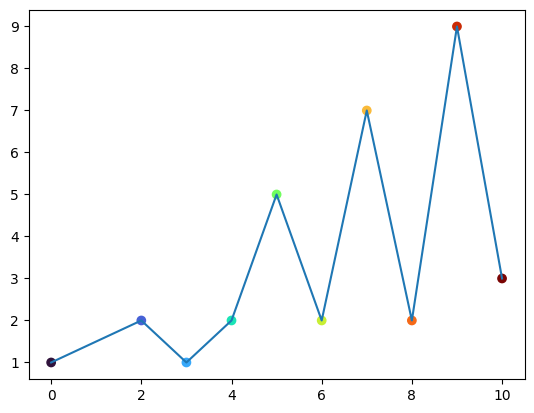

In [7]:
from matplotlib import colormaps
print(list(colormaps))
x = (0,2,3,4,5,6,7,8,9,10)
y = (1,2,1,2,5,2,7,2,9,3)
cmap = plt.get_cmap('turbo')
colors = [cmap(i) for i in np.linspace(0, 1, len(x))]
plt.plot(x, y)
plt.scatter(x, y, color=colors)
#plt.show()